In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os
from google.colab import drive
import kagglehub

drive.mount('/content/drive', force_remount=True)

drive_save_path = "/content/drive/MyDrive/vehicle_classification_model_cnn.keras"

drive_path = kagglehub.dataset_download("mohamedmaher5/vehicle-classification")


img_size = (128, 128)
batch_size = 32


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    os.path.join(drive_path, "Vehicles"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    os.path.join(drive_path, "Vehicles"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


cnn_model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(len(train_generator.class_indices), activation='softmax')
])

cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)


epochs = 15
cnn_model.fit(train_generator, validation_data=validation_generator, epochs=epochs,
              callbacks=[early_stopping, reduce_lr])


cnn_model.save(drive_save_path)
print(f"Model saved at {drive_save_path}")


Mounted at /content/drive


100%|██████████| 827M/827M [00:37<00:00, 23.1MB/s]

Extracting files...


Found 4470 images belonging to 7 classes.
Found 1117 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
 65/140 ━━━━━━━━━━━━━━━━━━━━ 27s 364ms/step - accuracy: 0.2952 - loss: 2.6814

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 82s 523ms/step - accuracy: 0.3365 - loss: 2.2974 - val_accuracy: 0.1773 - val_loss: 3.1949 - learning_rate: 1.0000e-04
Epoch 2/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 67s 477ms/step - accuracy: 0.4880 - loss: 1.4194 - val_accuracy: 0.2184 - val_loss: 4.7183 - learning_rate: 1.0000e-04
Epoch 3/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 90s 532ms/step - accuracy: 0.5321 - loss: 1.2950 - val_accuracy: 0.3841 - val_loss: 2.1099 - learning_rate: 1.0000e-04
Epoch 4/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 67s 480ms/step - accuracy: 0.5664 - loss: 1.2187 - val_accuracy: 0.5909 - val_loss: 1.1310 - learning_rate: 1.0000e-04
Epoch 5/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 475ms/step - accuracy: 0.6114 - loss: 1.1016 - val_accuracy: 0.6446 - val_loss: 1.0364 - learning_rate: 1.0000e-04
Epoch 6/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 473ms/step - accuracy: 0.6132 - loss: 1.1047 - val_accuracy: 0.6526 - val_loss: 0.9905 - learning_rate: 1.0000e-04
Epoch 7/15
140/140 ━━━━━━━━━━━━━━━━━━━━ 67s 480ms/step - 

Mounted at /content/drive
Google Drive mounted successfully.
CNN Model loaded successfully.
yolov3.weights already exists.
yolov3.cfg already exists.
coco.names already exists.


Saving traffic signal.jpg to traffic signal (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/st

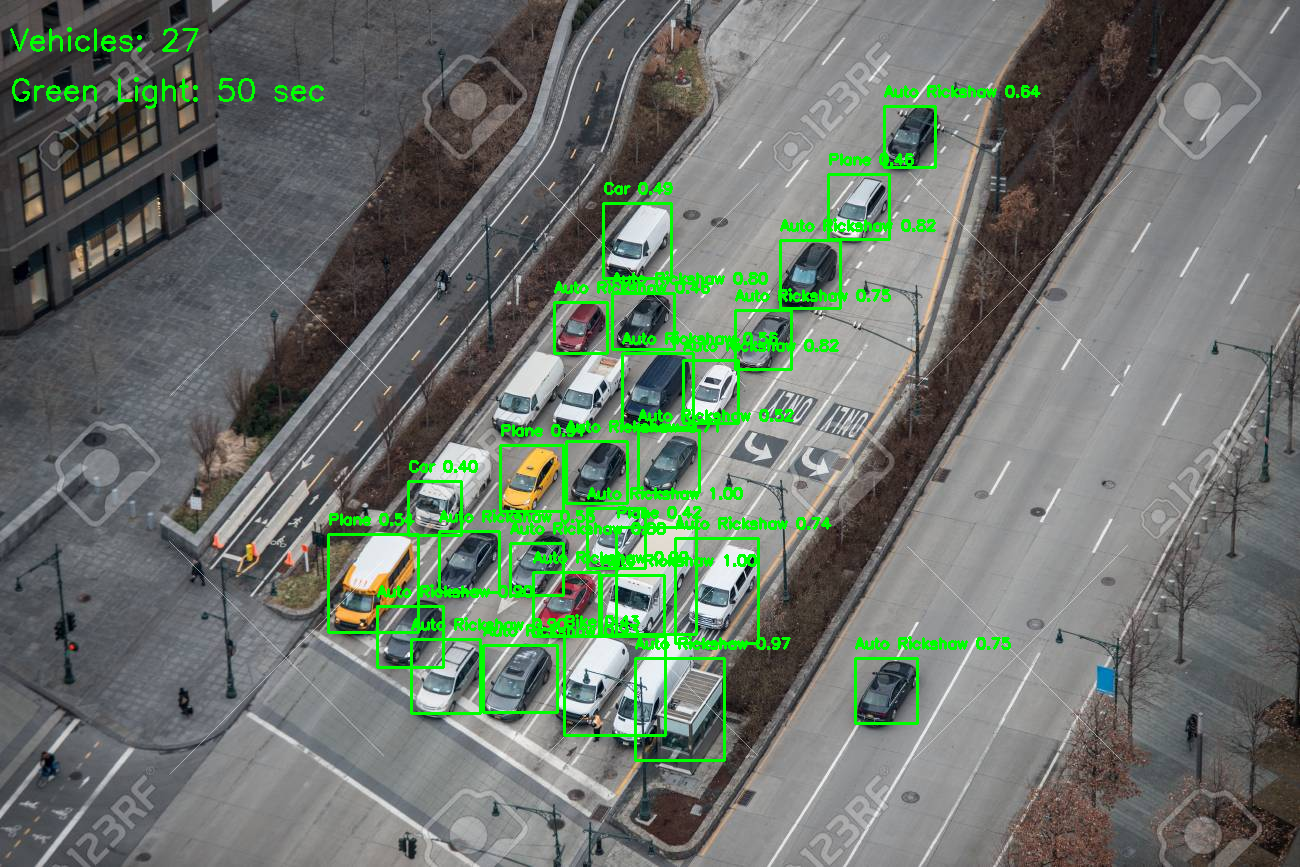

In [5]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from google.colab import drive
from google.colab import files
import os


def mount_drive():
    drive.mount('/content/drive', force_remount=True)
    print("Google Drive mounted successfully.")

mount_drive()


model_path = "/content/drive/MyDrive/vehicle_classification_model_cnn.keras"
if not os.path.exists(model_path):
    raise Exception(f"Model file not found at {model_path}")

cnn_model = tf.keras.models.load_model(model_path)
print("CNN Model loaded successfully.")


def preprocess_image(img, target_size=(128, 128)):
    """ Resize and normalize image for CNN model """
    img = cv2.resize(img, target_size)
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)
    return img


yolo_dir = "/content/drive/MyDrive/yolo_files"
os.makedirs(yolo_dir, exist_ok=True)

def download_yolo_files():
    files_needed = {
        "yolov3.weights": "https://pjreddie.com/media/files/yolov3.weights",
        "yolov3.cfg": "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg",
        "coco.names": "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"
    }

    for file, url in files_needed.items():
        file_path = os.path.join(yolo_dir, file)
        if not os.path.exists(file_path):
            print(f"Downloading {file}...")
            os.system(f"wget {url} -O {file_path}")
        else:
            print(f"{file} already exists.")

download_yolo_files()


net = cv2.dnn.readNet(os.path.join(yolo_dir, "yolov3.weights"), os.path.join(yolo_dir, "yolov3.cfg"))
with open(os.path.join(yolo_dir, "coco.names"), "r") as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]


uploaded = files.upload()
file_path = list(uploaded.keys())[0]
frame = cv2.imread(file_path)
height, width, channels = frame.shape


blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

class_ids = []
confidences = []
boxes = []
vehicle_classes = ["car", "truck", "bus", "motorbike"]

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.4 and classes[class_id] in vehicle_classes:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.3)


vehicle_labels = ["Auto Rickshaw", "Bike", "Car", "Motorcycle", "Plane", "Ship", "Train"]  # Adjust as per dataset

for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        detected_vehicle = frame[y:y+h, x:x+w]

        if detected_vehicle.shape[0] > 0 and detected_vehicle.shape[1] > 0:  # Ensure valid crop
            preprocessed_img = preprocess_image(detected_vehicle)
            prediction = cnn_model.predict(preprocessed_img)
            class_index = np.argmax(prediction)
            vehicle_label = vehicle_labels[class_index]
            confidence = np.max(prediction)

            # Draw bounding box & classification label
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(frame, f"{vehicle_label} {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


vehicle_count = len(indexes)

if vehicle_count < 10:
    green_light_duration = 10
elif 10 <= vehicle_count <= 20:
    green_light_duration = 30
else:
    green_light_duration = 50

cv2.putText(frame, f'Vehicles: {vehicle_count}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
cv2.putText(frame, f'Green Light: {green_light_duration} sec', (10, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)


cv2_imshow(frame)
